# Computing overlaps of knot cores with minimums

In [1]:
from datasets import Dataset, load_dataset
import pandas as pd
from tqdm import tqdm

In [2]:
PATCH_SIZE = 40
INPUT = f'/home/jovyan/data/proteins_m1/preds_{PATCH_SIZE}_minimums.csv'
OUTPUT_REDUCED = f'/home/jovyan/data/proteins_m1/preds_{PATCH_SIZE}_minimums_reduced.csv'

In [3]:
df_reduced = pd.read_csv(INPUT, sep=';')
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


Take only the sequences with a knot prediction:

In [4]:
# sequences that have at least some prediction:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'].notnull()]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


In [5]:
# sequences that would get predicted as having a knot:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'] > 0.5]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


Take only the sequences with patched predictions:

In [6]:
df_reduced = df_reduced.loc[df_reduced['patched_preds'].notnull()]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


In [7]:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'] > df_reduced['min_pred']]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


Calculate overlaps of minimum prediction with actual knot core interval:

In [8]:
df_reduced['min_start'] = pd.to_numeric(df_reduced['min_start'])
df_reduced['min_pred'] = pd.to_numeric(df_reduced['min_pred'])
df_reduced['knot_start'] = pd.to_numeric(df_reduced['knot_start'])
df_reduced['knot_end'] = pd.to_numeric(df_reduced['knot_end'])
df_reduced

/tmp/ipykernel_32761/4130933733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_start'] = pd.to_numeric(df_reduced['min_start'])
/tmp/ipykernel_32761/4130933733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_pred'] = pd.to_numeric(df_reduced['min_pred'])
/tmp/ipykernel_32761/4130933733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics


In [9]:
df_reduced['min_end'] = df_reduced.apply(lambda row: row['min_start'] + PATCH_SIZE, axis=1)
df_reduced

/tmp/ipykernel_32761/158171106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_end'] = df_reduced.apply(lambda row: row['min_start'] + PATCH_SIZE, axis=1)


,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT,268
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT,344
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT,192
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT,364
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT,288
...,...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial,441
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial,427
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics,219
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics,77


In [10]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [11]:
df_reduced['overlap_pred'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_predicted(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
df_reduced['overlap_real'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_real(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
df_reduced['overlap'] = df_reduced.apply(lambda row: calculate_score_overlap(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)   
df_reduced

/tmp/ipykernel_32761/1137954113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['overlap_pred'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_predicted(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
/tmp/ipykernel_32761/1137954113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['overlap_real'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_real(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT,268,0.450,0.086538,0.078261
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT,344,0.075,0.014151,0.012048
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT,192,0.100,0.083333,0.047619
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT,364,0.675,0.421875,0.350649
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT,288,0.325,0.309524,0.188406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial,441,1.000,0.112994,0.112994
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial,427,0.700,0.084848,0.081871
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics,219,0.000,0.000000,-0.422680
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics,77,0.000,0.000000,-0.625000


## Visualize results:

Three types of overlap are calculated:

1. with respect to predicted lengths,

2. w.r.t. to real length,

3. intersection over union (attempts at joining the two previous ones into one score).

Ideal outcome would be if both 1., 2. overlaps were high (=> intervals are almost identital).

If both are 0, there is no overlap.

If w.r.t. pred is high and w.r.t. real is low, it means that the chosen patch size was too small.

In [12]:
print('-- w.r.t. predicted length:')
pred_mean = df_reduced['overlap_pred'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['overlap_pred'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['overlap_pred'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['overlap_pred'].min()
print(f'Min: {pred_min}')
    
print('\n-- w.r.t. real length:')
real_mean = df_reduced['overlap_real'].mean()
print(f'Mean: {real_mean}')
real_med = df_reduced['overlap_real'].median()
print(f'Med: {real_med}')
real_max = df_reduced['overlap_real'].max()
print(f'Max: {real_max}')
real_min = df_reduced['overlap_real'].min()
print(f'Min: {real_min}')
    
print('\n-- intersection over union:')
real_mean = df_reduced['overlap'].mean()
print(f'Mean: {real_mean}')
real_med = df_reduced['overlap'].median()
print(f'Med: {real_med}')
real_max = df_reduced['overlap'].max()
print(f'Max: {real_max}')
real_min = df_reduced['overlap'].min()
print(f'Min: {real_min}')

-- w.r.t. predicted length:
Mean: 0.710471579702349
Med: 0.8
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.24907131435965388
Med: 0.17316017316017315
Max: 0.975609756097561
Min: 0.0

-- intersection over union:
Mean: 0.18954152873482713
Med: 0.1724137931034483
Max: 0.975609756097561
Min: -0.9122807017543859


In [13]:
PRED_THRESHOLD = 0.7
REAL_THRESHOLD = 0.7
BOTH_THRESHOLD = 0.2

def get_simple_results_positive(df):
    simple_results = []
    sequences_count = df.shape[0]
    reasonable_wrt_pred_count = df.loc[df['overlap_pred'] >= PRED_THRESHOLD].shape[0]
    reasonable_wrt_real_count = df.loc[df['overlap_real'] >= REAL_THRESHOLD].shape[0]
    reasonable_wrt_count = df.loc[df['overlap'] > PRED_THRESHOLD].shape[0]

    simple_results.append({'patch': PATCH_SIZE,
                           'count w.r.t. pred': reasonable_wrt_pred_count,
                           'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                           'count w.r.t. real': reasonable_wrt_real_count,
                           'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                           'count w.r.t. intersection': reasonable_wrt_count,
                           'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_positive(df_reduced)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,40,3382,0.606419,262,0.046979,186,0.033351


In [14]:
!pip install matplotlib

/tmp/ipykernel_32761/2858573433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['index'] = df_reduced.index


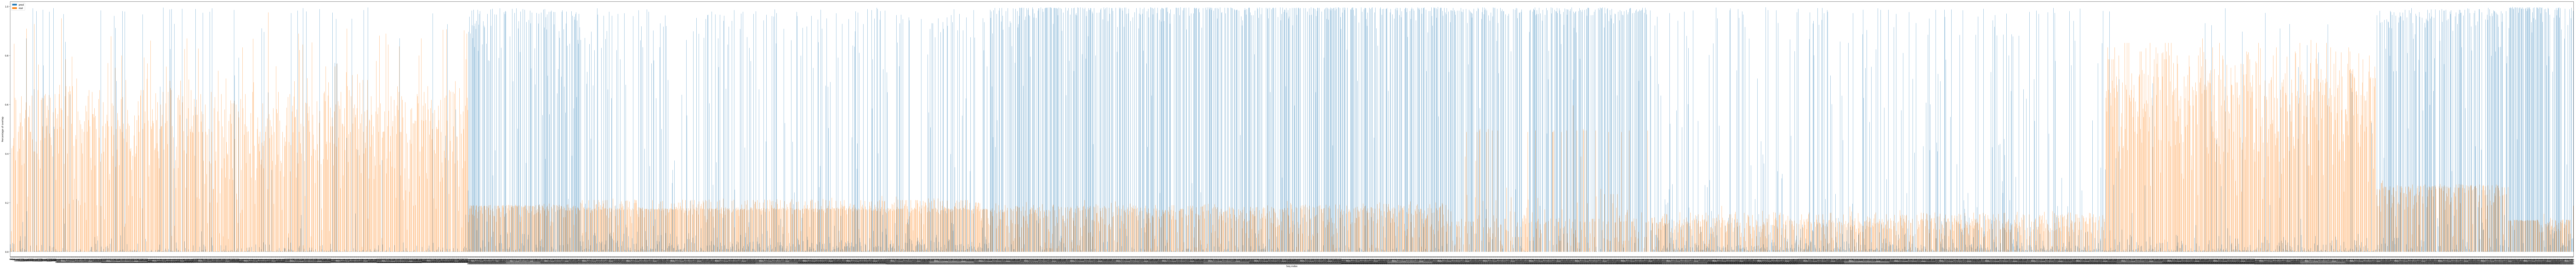

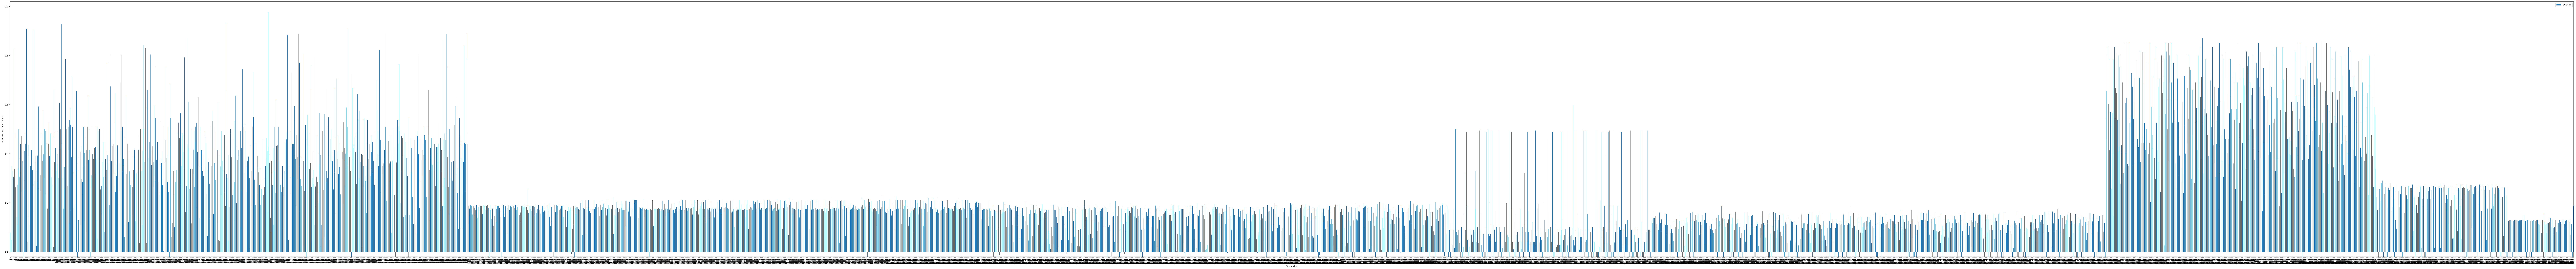

In [15]:
import matplotlib.pyplot as plt

def plot_overlap_scores(df):
    plt.rcParams['figure.figsize'] = (200, 20)
    ax = df.plot(x='index', y=['min_pred', 'overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
    ax.legend(['pred', 'real'])
    ax.set_xlabel(f'Seq index')
    ax.set_ylabel('Percentage of overlap')
    plt.show()
        
    ax = df.plot(x='index', y=['overlap'], kind='bar', ylim=(-0.02,1.02))
    ax.set_xlabel(f'Seq index')
    ax.set_ylabel('Intersection over union')
    plt.show()

df_reduced['index'] = df_reduced.index
plot_overlap_scores(df_reduced)

### Checks drops in prediction score:

In [16]:
pred_mean = df_reduced['min_pred'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['min_pred'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['min_pred'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['min_pred'].min()
print(f'Min: {pred_min}')

Mean: 0.32485535594966863
Med: 0.02642822265625
Max: 0.99755859375
Min: 1.919269561767578e-05


Check average difference in prediction score drop:

In [17]:
df_reduced['drop_difference'] = df_reduced.apply(lambda row: row['sequence_pred'] - row['min_pred'], axis = 1)
df_reduced

/tmp/ipykernel_32761/1061911755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['drop_difference'] = df_reduced.apply(lambda row: row['sequence_pred'] - row['min_pred'], axis = 1)


,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.993164,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9931640625, 0.994140625, 0.994140625, 0.993...",228,0.030334,38,246,SPOUT,268,0.450,0.086538,0.078261,0,0.962830
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.997559,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99755859375, 0.99755859375, 0.99755859375, ...",304,0.966309,95,307,SPOUT,344,0.075,0.014151,0.012048,1,0.031250
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.996094,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99609375, 0.99609375, 0.99609375, 0.9960937...",152,0.002371,108,156,SPOUT,192,0.100,0.083333,0.047619,2,0.993723
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99658203125, 0.99658203125, ...",324,0.002867,287,351,SPOUT,364,0.675,0.421875,0.350649,3,0.993715
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.995605,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99560546875, 0.9951171875, 0.9951171875, 0....",248,0.000133,219,261,SPOUT,288,0.325,0.309524,0.188406,4,0.995473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,0.996582,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.99658203125, 0.99609375, 0.99609375, 0.9960...",401,0.994629,112,466,ribosomal-mitochondrial,441,1.000,0.112994,0.112994,5725,0.001953
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,0.979980,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.97998046875, 0.9697265625, 0.96923828125, 0...",387,0.051880,85,415,ribosomal-mitochondrial,427,0.700,0.084848,0.081871,5726,0.928101
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,0.958984,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.958984375, 0.9736328125, 0.97265625, 0.9760...",179,0.886230,342,470,biosynthesis of lantibiotics,219,0.000,0.000000,-0.422680,5727,0.072754
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,0.954102,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9541015625, 0.966796875, 0.95751953125, 0.9...",37,0.055328,317,421,biosynthesis of lantibiotics,77,0.000,0.000000,-0.625000,5728,0.898773


In [18]:
pred_mean = df_reduced['drop_difference'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['drop_difference'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['drop_difference'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['drop_difference'].min()
print(f'Min: {pred_min}')

Mean: 0.6693084790386764
Med: 0.9642334234375
Max: 0.999003532048645
Min: 0.0004883062499999591


In [19]:
df_reduced.to_csv(OUTPUT_REDUCED, index=False)